<a href="https://colab.research.google.com/github/SirimarcoUERJ/MachineLearning/blob/main/NaiveBayes_CensusData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes**

## Base de Dados (Census).**bold text**

In [7]:
import pickle as pkl
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
arq = "/content/drive/MyDrive/Colab Notebooks/Machine Learn/data/census.pkl"
with open(arq, "rb") as f:
  x_treino, y_treino, x_teste, y_teste = pkl.load(f)

In [12]:
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [15]:
naive_census = GaussianNB()
naive_census.fit(x_treino, y_treino)
previsoes = naive_census.predict(x_teste)
previsoes, y_teste

(array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype=object))

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
accuracy_score(y_teste, previsoes)

0.4767656090071648

In [19]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

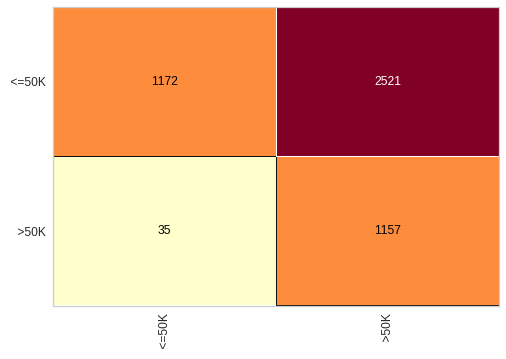

In [20]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [22]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

